# Razumova Model of Stiffness/ Distortion with varying cooperative mechanisms
## Notebook prepared by: K.J. McCabe

Here we will work through the stiffness distortion crossbridge model proposed in 2000 by Maria V. Razumova, Anna E. Bukatina, and Kenneth B. Campbell.

The model represents a half sarcomere, and relies on the assumption that the force generated in a given sarcomere unit is equal to the sum of forces of each individual crossbridge (XB) in the region. The model also represents force as the product of the stiffness of all parallel cross bridges and their average distortion.

So, we can represent the force of a half sarcomere as: 
$$\begin{align}
F(t) = e\sum_{i=1}^{n}A_i(t)x_i(t)
\end{align}
$$
Where e is the stiffness of a XB, $A_i(t)$ is the number of XBs in the $i$th state, and $x_i(t)$ average distortion of XBs in the $i$th state.

Both $A_i$ and $x_i$ vary in time, and should depend on a number of important mechanisms such as Calcium availability, filament overlap, regulatory protein dynamics, and XB kinetics. For this model, the authors focused on the latter 2 mechanisms and held filament overlap and $[Ca^{2+}]$ constant.

<img src="fig/Razumova_Schematic.png" width=400></img>
**Figure** The model has 4 main states, outlined in this schematic. $R_{off}$ represents a regulatory unit where the thin filament is inactive. D is the detached state, with active thin filament. $A_{1}$ is attached XB pre-powerstroke, and $A_{1}$ is attached XB post-powerstroke.

Using inspection and our knowledge of mass-action kinetics, we can write ODEs for the system:
$$\begin{align}
\\
\dot{D}(t) = k_{on}R_{off}(t)+f'A_1(t)+gA_2(t)-(k_off+f)D(t)\\
\dot{A_1}(t) = fD(t)+ h'A_2(t)-[f'+h]A_1(t)\\
\dot{A_2}(t) = hA_1(t)-[h'+g]A_2(t)\\
\\
\end{align}
$$
Mass conservation tells us that $R_{off}(t) = R_T-{D}(t)- A_1(t)-A_2(t)$ where $R_T$ represents the total number of crossbridges for a particular filament overlap fraction. Though the model does not consider filament overlap, one could introduce length-dependence into the model by adjusting $R_T$.

Let's see how this simple crossbridge model can be modeled before we add complexity.

In [1]:
# Import necessary packages
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.special import expit
%matplotlib inline


In [3]:
#Set initial conditions- inactivated
D_0 = 0.00;   
A1_0 = 0.00; 
A2_0 = 0.00; 

#set constants 
R_T = 1;
k_on = 400;       #Rate from nonpermissive to permissive
k_off = 50;
f = 50;           # attachment rate
f_prime = 400; 
h = 8;            #powerstroke rate
h_prime = 6;
g = 4;

params = (R_T, k_on, k_off, f, f_prime,  h, h_prime, g)

In [4]:
# Implement the right-hand-side of the system

def rhs(y, t, R_T, k_on, k_off, f, f_prime,  h, h_prime, g):
    D, A_1, A_2 = y

    dD_dt = k_on*(R_T - D - A_1 - A_2)+f_prime*A_1+g*A_2-(k_off+f)*D
    dA1_dt = f*D+h_prime*A_2-(f_prime+h)*A_1
    dA2_dt = h*A_1-(h_prime+g)*A_2
    
    return [dD_dt, dA1_dt, dA2_dt]

# Make a vector of time points where solutions are to be computed
time = np.linspace(0, 10, 5000)

# Define the initial condition
y_0 = (D_0, A1_0, A2_0)


# Call the ODE solver
solutions = odeint(rhs, y_0, time, params)
D, A_1, A_2 = np.hsplit(solutions, 3)



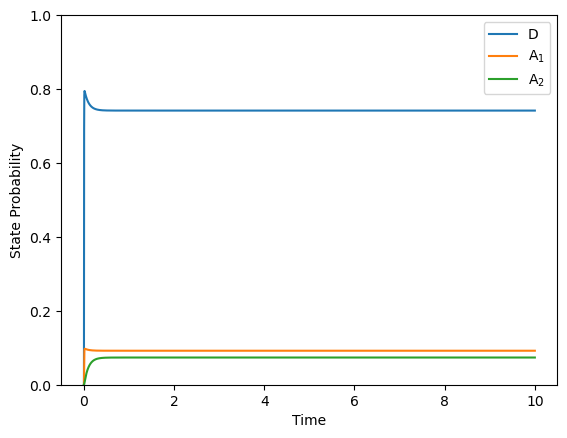

In [5]:
# Plot data with labels
plt.plot(time, D, label=r'D')
plt.plot(time, A_1, label=r'A$_1$')
plt.plot(time, A_2, label=r'A$_2$')

# plot
plt.xlabel('Time')
plt.ylabel('State Probability')
plt.legend()
plt.ylim(0,1)

plt.show()

For now, we will consider that the total force produced by the system is proportional to the number of XBs in the post-powerstroke $A_2$ state. So, if we wish to see the rate of tension development in the system, we can calculate $k_{dev}$ by taking the reciprocal of the time required to reach $(1-1/e)f_{max}$

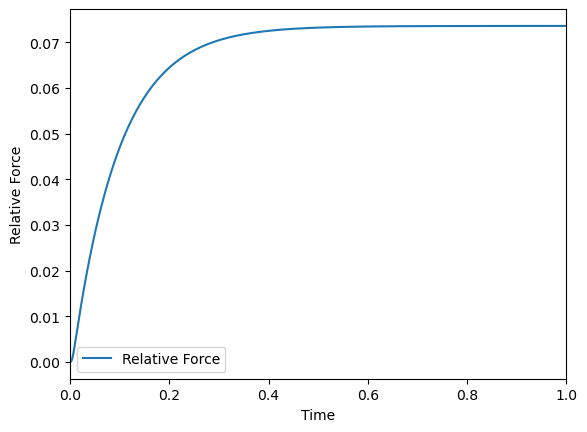

k_dev =  9.998  1/sec


In [6]:
#Timecourse of force development at constant [Ca2+]

plt.plot(time, A_2, label=r'Relative Force')

# plot
plt.xlabel('Time')
plt.ylabel('Relative Force')
plt.legend()
plt.xlim(0,1)

plt.show()

#calculate k_dev
f_max = A_2[len(A_2)-1]
f_half = (1-(1/e))*f_max
index = 0
while A_2[index] < f_half:
    index+=1
t_half = time[index]
ktr = 1 / t_half
print("k_dev = ",ktr, " 1/sec")

This simplified model is missing components necessary to match a number of experimental data sets, most importantly the Steady-state force-pCa curve. What do we need to add to this model to be able to match a curve like this one?
<img src="fig/Force_pCa_Raz.png" width=400></img>


In [7]:
from L11_widgets import ReactionWidget
ReactionWidget().display()

interactive(children=(FloatSlider(value=400.0, description='k_on', max=500.0, min=100.0, step=2.0), FloatSlide…